In [25]:
import pandas as pd
import numpy as np
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

import sys

sys.path.append("/home/pqian/data/kaggle/js-2024")
import kaggle_evaluation.jane_street_inference_server

# data process

In [8]:
PATH = "/home/pqian/data/kaggle/js-2024/"
features = pd.read_csv(f"{PATH}/features.csv")
train_feat = pd.read_parquet(f"{PATH}/train.parquet/partition_id=1/part-0.parquet")
test_feat = pd.read_parquet(f"{PATH}/test.parquet/date_id=0/part-0.parquet")

In [12]:
train_feat

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,170,0,0,2.112212,NaN,NaN,NaN,NaN,NaN,1.060330,...,-0.421823,-0.293646,-0.061842,-0.305413,-0.419151,-0.111796,-0.535104,-0.044332,-0.039061,-0.744789
1,170,0,1,2.760715,NaN,NaN,NaN,NaN,NaN,0.482468,...,3.111076,-0.075267,-0.359360,-1.270054,-0.018332,-0.040286,-1.417509,0.085840,0.487232,-0.124533
2,170,0,2,1.813596,NaN,NaN,NaN,NaN,NaN,1.020798,...,0.458474,-5.000000,-5.000000,0.194658,-5.000000,-5.000000,-5.000000,1.583400,0.018712,-1.055035
3,170,0,3,0.926893,NaN,NaN,NaN,NaN,NaN,0.510098,...,17.805511,3.336086,2.051951,2.400644,0.962730,-0.939277,1.845870,-2.372452,-1.663179,-4.585349
4,170,0,7,1.665231,NaN,NaN,NaN,NaN,NaN,0.547458,...,-0.249322,-0.707027,-0.344866,-1.248052,-0.129645,-3.145927,-0.452708,0.300044,0.489202,0.242737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804242,339,848,19,4.384988,-0.357850,-1.135620,-0.375377,0.005456,-1.241660,-0.139730,...,-0.118423,0.163901,0.134067,1.124346,0.484879,0.255225,0.479602,0.008540,0.027126,0.000452
2804243,339,848,30,0.913199,0.013418,-1.095379,-0.315413,-0.227001,-1.131748,-0.119023,...,-0.094272,0.637513,-0.011480,1.779785,0.757132,0.274228,0.741818,1.014812,0.573904,2.359970
2804244,339,848,33,1.226038,-0.378911,-1.521467,0.209378,-0.241914,-1.597019,-0.082501,...,-0.196051,-3.343947,-1.012429,-2.968987,-1.112956,-0.598563,-1.537665,-0.259630,-0.105986,-0.480081
2804245,339,848,34,1.267464,-0.343313,-1.548126,-0.188658,0.174160,-1.160716,-0.150091,...,-0.221749,0.966054,0.551264,0.175104,-0.035818,-0.015150,-0.425369,-0.115926,-0.012685,-0.144224


## feature correlation

<Axes: >

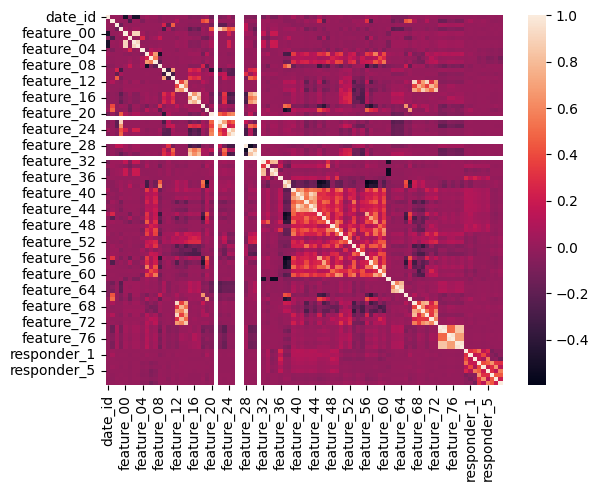

In [17]:
train_corr = train_feat.corr()
sns.heatmap(train_corr)

<Axes: >

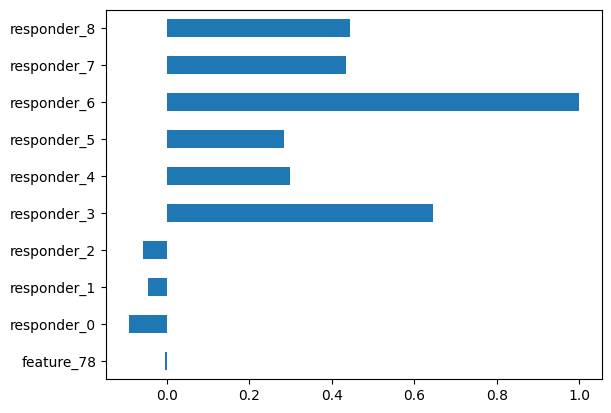

In [21]:
train_corr.responder_6[-10:].plot(kind="barh")